In [1]:
###### Libraries
import matplotlib 
import matplotlib.pyplot
import matplotlib.pyplot as plt  # Import the basic python plotting library.
import matplotlib.pylab as  pylab  # Used to change font sizes.
from matplotlib.lines import Line2D
%matplotlib inline
import matplotlib as mpl #To change font family?
from scipy import stats
from scipy.interpolate import UnivariateSpline
import seaborn as sns  # Import a library which makes the basic one look fancier.
import numpy as np  # Import numerical array processing library.
import pandas as pd #Import for data manipulation and array

In [2]:
###### DSP: Dataframe and summary

dsp = pd.read_csv("DSP_ALL_2020_removed.csv")
dsp.groupby(["Group", "Sex"]).mean()

shortcut  Shortcut liberal   Learned  Learned liberal  \
Group   Sex                                                             
Midlife Female  2.157895          0.631579  4.000000         2.263158   
        Male    2.476190          2.190476  3.619048         2.666667   
Young   Female  2.961538          2.769231  2.538462         3.115385   
        Male    5.714286          4.107143  1.428571         2.250000   

                Reversed Learned  rev learned liberal  wandering  uncodable  \
Group   Sex                                                                   
Midlife Female          0.894737             1.105263   0.315789   1.789474   
        Male            0.761905             1.571429   0.285714   1.904762   
Young   Female          0.769231             1.884615   0.115385   2.653846   
        Male            0.750000             1.821429   0.642857   2.500000   

                 Failure  shortcut_wliberal    ...      SI_strict  Sum_trials  \
Group   Sex                                    ...                              
Midlife Female  5.842105           2.789474    ...       0.171214   19.000000   
        Male    4.285714           4.666667    ...       0.153811   19.761905   
Young   Female  3.038462           5.730769    ...       0.177319   19.846154   
        Male    0.785714           9.821429    ...       0.295334   20.000000   

                Success_dec  Success_percent  TrueEfficiency  \
Group   Sex                                                    
Midlife Female     0.696491        69.649123        2.692752   
        Male       0.780952        78.095238        2.612357   
Young   Female     0.845192        84.519231        2.410579   
        Male       0.960714        96.071429        2.294511   

                TrueEfficiency_new       Time    Distance  \
Group   Sex                                                 
Midlife Female            3.195911  29.739115  418.712832   
        Male              2.991855  27.244833  391.966151   
Young   Female            2.816555  24.711236  373.645303   
        Male              2.412541  19.114821  321.980446   

                Time_first_movement        Age  
Group   Sex                                     
Midlife Female             2.994729  51.210526  
        Male               3.364754  51.333333  
Young   Female             2.351659  19.807692  
        Male               1.815143  19.928571  

[4 rows x 26 columns]

In [3]:
###### DSP: Checking

#Young
dsp_young = dsp[dsp.Group == "Young"]
#Old
dsp_old = dsp[dsp.Group == "Midlife"]


#Young Female
dsp_young_female = dsp_young[dsp_young.Sex == "Female"]
print(dsp_young_female.describe())
#Young Male
dsp_young_male = dsp_young[dsp_young.Sex == "Male"]
print(dsp_young_male.describe())
#Old Female
dsp_old_female = dsp_old[dsp_old.Sex == "Female"]
print(dsp_old_female.describe())
#Old Male
dsp_old_male = dsp_old[dsp_old.Sex == "Male"]
print(dsp_old_male.describe())

        shortcut  Shortcut liberal    Learned  Learned liberal  \
count  26.000000         26.000000  26.000000        26.000000   
mean    2.961538          2.769231   2.538462         3.115385   
std     2.087693          2.268174   2.533468         2.371951   
min     0.000000          0.000000   0.000000         0.000000   
25%     1.250000          1.000000   1.000000         1.000000   
50%     3.000000          2.000000   1.500000         3.000000   
75%     4.750000          3.750000   3.000000         4.000000   
max     9.000000          8.000000   9.000000         9.000000   

       Reversed Learned  rev learned liberal  wandering  uncodable    Failure  \
count         26.000000            26.000000  26.000000  26.000000  26.000000   
mean           0.769231             1.884615   0.115385   2.653846   3.038462   
std            1.106623             1.366072   0.325813   2.348486   2.253544   
min            0.000000             0.000000   0.000000   0.000000   0.000000   


In [4]:
###### DSP: Proportion Correct Mean

dsp_young_f_succ_mean =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Female')].Success_dec.mean()
print(dsp_young_f_succ_mean)

dsp_young_m_succ_mean =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Male')].Success_dec.mean()
print(dsp_young_m_succ_mean)

dsp_old_f_succ_mean =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Female')].Success_dec.mean()
print(dsp_old_f_succ_mean)

dsp_old_m_succ_mean =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Male')].Success_dec.mean()
print(dsp_old_m_succ_mean)



###### DSP: Proportion Correct SEM

dsp_young_f_succ_sem =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Female')].Success_dec.sem()
print(dsp_young_f_succ_sem)

dsp_young_m_succ_sem =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Male')].Success_dec.sem()
print(dsp_young_m_succ_sem)

dsp_old_f_succ_sem =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Female')].Success_dec.sem()
print(dsp_old_f_succ_sem)

dsp_old_m_succ_sem =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Male')].Success_dec.sem()
print(dsp_old_m_succ_sem)

0.8451923076923075
0.9607142857142855
0.6964912280526316
0.7809523809523811
0.023039232040537972
0.011884904072914237
0.03542600088174469
0.03133463595497543


C:\Users\shuying\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


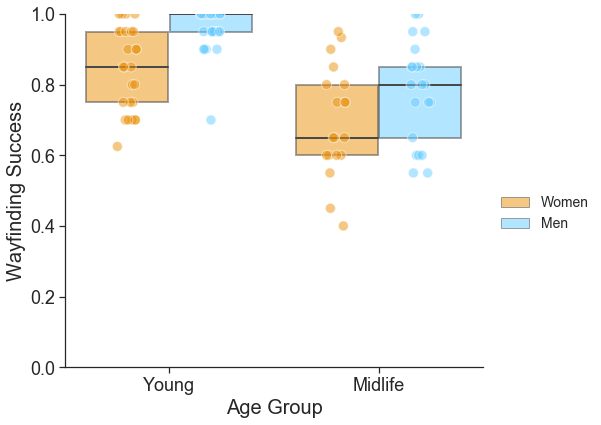

In [75]:
#BOXPLOT

#Font
#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 

#Create foundation for plot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6.5))
#fig.subplots_adjust(right=0.8)

#pink=#ff3399
color_pal = ['#eb9109', '#66ccff']

sns.set(style="ticks")


ax = sns.boxplot(x="Group", y="Success_dec", hue="Sex", data=dsp, 
                 palette=color_pal, order=["Young", "Midlife"],
                 linewidth=2, showfliers = False, saturation=1, whis=False, showcaps=False,
                 meanprops={"marker":" "},
                boxprops=dict(alpha=.5))

sns.stripplot(x="Group", y="Success_dec", hue="Sex", data=dsp,
              palette=color_pal, order=["Young", "Midlife"],
              size=10, edgecolor="white", split=True, alpha=0.5,
             linewidth=1, jitter=True)

#bbox_to_anchor=(1.05, 1), borderaxespad=0.
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[:2], labels[:2], loc=2,
                 frameon=False, fontsize='14',
                 bbox_to_anchor=(1.03, 0.5), borderaxespad=0.)
leg.get_texts()[0].set_text('Women')
leg.get_texts()[1].set_text('Men')
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)

#Add significance bar and asterisk to legend
    

#Add x-ticks on the middle of the group bars
plt.xlabel('Age Group', fontsize='20')
#15 spaces
#plt.ylabel('Wayfinding Success               ', fontsize='20', horizontalalignment='center')
plt.ylabel('Wayfinding Success', fontsize='20', horizontalalignment='center')
plt.xticks([0,1],['Young', 'Midlife'], fontsize='18')


#Limits for the y-axis
plt.ylim(0,1) #0-1.1
#plt.legend(frameon=False, fontsize='14', loc='center right')
ax = plt.gca()
#ax.set_yticks(np.linspace(0, 1, 5))
#ax.get_yticklines()[-2].set_visible(False)
#ax.get_yticklabels()[-2].set_visible(False)
#ax.spines['left'].set_bounds(0, 1)
#ax.set_yticks(ax.get_yticks()[:-2]) 



#Remove right and top frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# statistical annotation
#young vs midlife
#x1, x2 = 0, 1
#y, h, col = dsp['Success_dec'].max() + 0.1, 0, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, (y-.01)+h, "***", ha='center', va='bottom', color=col, fontsize='20')

#young female vs young male
#x1, x2 = -0.2, 0.2
#y, h, col = dsp['Success_dec'].max() + 0.1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y+.025)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#old female vs old male
#x1, x2 = 0.8, 1.2
#y, h, col = dsp['Success_dec'].max() + 0.1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y+.025)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#plt.savefig('Yu_Fig4A_2021.png', dpi=1200)
plt.show()


In [15]:
###### DSP: Solution Index


dsp_young_f_si_mean =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Female')].SI_strict.mean()
print(dsp_young_f_si_mean)

dsp_young_m_si_mean =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Male')].SI_strict.mean()
print(dsp_young_m_si_mean)

dsp_old_f_si_mean =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Female')].SI_strict.mean()
print(dsp_old_f_si_mean)

dsp_old_m_si_mean =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Male')].SI_strict.mean()
print(dsp_old_m_si_mean)



###### DSP: Solution Index SEM

dsp_young_f_si_sem =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Female')].SI_strict.sem()
print(dsp_young_f_si_sem)

dsp_young_m_si_sem =  dsp[(dsp.Group=='Young') & (dsp.Sex=='Male')].SI_strict.sem()
print(dsp_young_m_si_sem)

dsp_old_f_si_sem =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Female')].SI_strict.sem()
print(dsp_old_f_si_sem)

dsp_old_m_si_sem =  dsp[(dsp.Group=='Midlife') & (dsp.Sex=='Male')].SI_strict.sem()
print(dsp_old_m_si_sem)

0.17731860284615383
0.2953335721428571
0.17121364615789475
0.1538113531904762
0.023213444101684154
0.027757054561113048
0.02854012502816768
0.02310598076263121


C:\Users\shuying\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


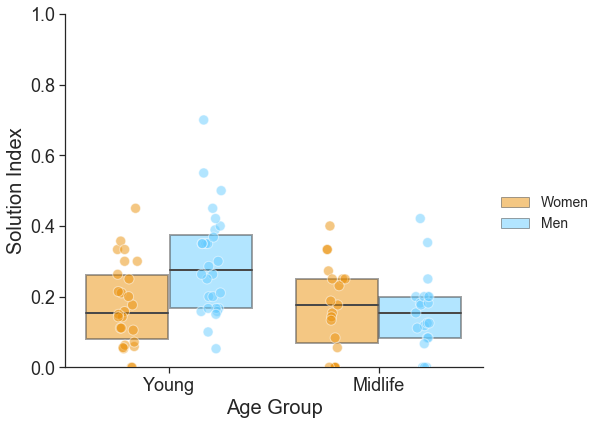

In [63]:
#BOXPLOT


#Font
#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 


#Create foundation for plot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6.5))
#fig.subplots_adjust(right=0.8)

#pink=#ff3399
color_pal = ['#eb9109', '#66ccff']

sns.set(style="ticks")
ax = sns.boxplot(x="Group", y="SI_strict", hue="Sex", data=dsp, 
                 palette=color_pal, order=["Young", "Midlife"],
                 linewidth=2, showfliers = False, saturation=1, whis=False, showcaps=False,
                 meanprops={"marker":" "},
                boxprops=dict(alpha=.5))
#plt.setp(ax.lines, color="black")
#boxprops=dict(alpha=.5)
#meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue","markersize":"8"}

sns.stripplot(x="Group", y="SI_strict", hue="Sex", data=dsp,
              palette=color_pal, order=["Young", "Midlife"],
              size=10, edgecolor="white", split=True, alpha=0.5,
             linewidth=1, jitter=True)


#bbox_to_anchor=(1.05, 1), borderaxespad=0.
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[:2], labels[:2], loc=2,
                 frameon=False,  fontsize='14',
                 bbox_to_anchor=(1.03, 0.5), borderaxespad=0.)
leg.get_texts()[0].set_text('Women')
leg.get_texts()[1].set_text('Men')
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)


#Add x-ticks on the middle of the group bars
plt.xlabel('Age Group', fontsize='20')
plt.ylabel('Solution Index', fontsize='20', horizontalalignment='center')
plt.xticks([0,1],['Young', 'Midlife'], fontsize='18')

#Remove right and top frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#Limits for the y-axis
plt.ylim(0,1) #adding sig bars and such on PPT
#plt.ylim(0,1.3)
#plt.legend(frameon=False, fontsize='14', loc='center right')
ax = plt.gca()
#ax.set_yticks(np.linspace(0, 100, 5))
#ax.get_yticklines()[-2].set_visible(False)
#ax.get_yticklabels()[-2].set_visible(False)
#ax.spines['left'].set_bounds(0, 1)
#ax.set_yticks(ax.get_yticks()[:-2]) 

# statistical annotation
#young vs midlife
#x1, x2 = 0, 1
#y, h, col = 1 + 0.2, 0, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, (y-.01)+h, "***", ha='center', va='bottom', color=col, fontsize='20')

#young female vs young male
#x1, x2 = -0.2, 0.2
#y, h, col = 1 + 0.1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y-.01)+h, "**", ha='center', va='bottom', color=col, fontsize='20')

#old female vs old male
#x1, x2 = 0.8, 1.2
#y, h, col = 1 + 0.1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y+.025)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#plt.savefig('Yu_Fig4B_2021.png', dpi=1200)
plt.show()

In [21]:
###### MAZE: Dataframe and summary

maze = pd.read_csv("MAZE_ALL_2020.csv")
maze.groupby(["Group", "Sex"]).mean()

Subject_ID        Age  AvgAccuracy  AvgAccuracy_Percent  \
Group   Sex                                                               
Midlife Female  331.960000  50.720000     0.088339             8.833867   
        Male    338.214286  50.500000     0.258929            25.892857   
Young   Female  525.346154  19.307692     0.219554            21.955385   
        Male    527.708333  19.583333     0.668213            66.821250   

                     Moves  
Group   Sex                 
Midlife Female  239.560000  
        Male    254.500000  
Young   Female  284.423077  
        Male    288.000000

In [22]:
###### MAZE: Checking

#Young
maze_young = maze[maze.Group == "Young"]
#Old
maze_old = maze[maze.Group == "Midlife"]
#Female
maze_female = maze[maze.Sex == "Female"]
#Male
maze_male = maze[maze.Sex == "Male"]

#Young Female
maze_young_female = maze_young[maze_young.Sex == "Female"]
print(maze_young_female.describe())
#Young Male
maze_young_male = maze_young[maze_young.Sex == "Male"]
print(maze_young_male.describe())
#Old Female
maze_old_female = maze_old[maze_old.Sex == "Female"]
print(maze_old_female.describe())
#Old Male
maze_old_male = maze_old[maze_old.Sex == "Male"]
print(maze_old_male.describe())

       Subject_ID        Age  AvgAccuracy  AvgAccuracy_Percent       Moves
count   26.000000  26.000000    26.000000            26.000000   26.000000
mean   525.346154  19.307692     0.219554            21.955385  284.423077
std     17.979861   1.319674     0.163533            16.353273   28.549148
min    501.000000  18.000000     0.000000             0.000000  230.000000
25%    510.250000  18.250000     0.125000            12.500000  260.250000
50%    519.500000  19.000000     0.187500            18.750000  293.000000
75%    542.750000  20.000000     0.281275            28.127500  305.750000
max    551.000000  24.000000     0.750000            75.000000  325.000000
       Subject_ID        Age  AvgAccuracy  AvgAccuracy_Percent       Moves
count   24.000000  24.000000    24.000000            24.000000   24.000000
mean   527.708333  19.583333     0.668213            66.821250  288.000000
std     10.023794   1.248187     0.313102            31.310155   35.724793
min    507.000000  18.000

In [23]:
###### MAZE: Mean

maze_young_f_mean =  maze[(maze.Group=='Young') & (maze.Sex=='Female')].AvgAccuracy.mean()
print(maze_young_f_mean)

maze_young_m_mean =  maze[(maze.Group=='Young') & (maze.Sex=='Male')].AvgAccuracy.mean()
print(maze_young_m_mean)

maze_old_f_mean =  maze[(maze.Group=='Midlife') & (maze.Sex=='Female')].AvgAccuracy.mean()
print(maze_old_f_mean)

maze_old_m_mean =  maze[(maze.Group=='Midlife') & (maze.Sex=='Male')].AvgAccuracy.mean()
print(maze_old_m_mean)



###### MAZE: Accuracy SEM

maze_young_f_sem =  maze[(maze.Group=='Young') & (maze.Sex=='Female')].AvgAccuracy.sem()
print(maze_young_f_sem)

maze_young_m_sem =  maze[(maze.Group=='Young') & (maze.Sex=='Male')].AvgAccuracy.sem()
print(maze_young_m_sem)

maze_old_f_sem =  maze[(maze.Group=='Midlife') & (maze.Sex=='Female')].AvgAccuracy.sem()
print(maze_old_f_sem)

maze_old_m_sem =  maze[(maze.Group=='Midlife') & (maze.Sex=='Male')].AvgAccuracy.sem()
print(maze_old_m_sem)

0.21955384615384615
0.6682125000000001
0.08833866668000001
0.25892857142857145
0.03207140697821239
0.06391158587004327
0.017892622279867033
0.07960920428655534


C:\Users\shuying\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


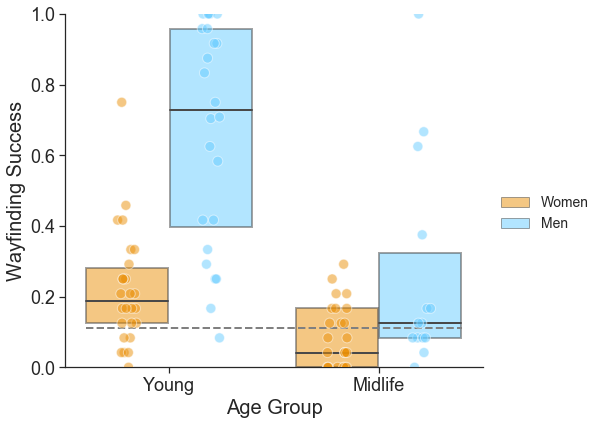

In [77]:
##### MAZE: Accuracy


#Font
#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 


#Create foundation for plot
fig, ax = plt.subplots(1, 1, figsize=(7.5, 6.5))
#fig.subplots_adjust(right=0.8)


#pink=#ff3399
color_pal = ['#eb9109', '#66ccff']

sns.set(style="ticks")
#Boxplot
ax = sns.boxplot(x="Group", y="AvgAccuracy", hue="Sex", data=maze,
                 palette=color_pal, order=["Young", "Midlife"],
                 linewidth=2, showfliers = False, saturation=1, whis=False, showcaps=False,
                 meanprops={"marker":" "}, 
                boxprops=dict(alpha=.5))


#plt.setp(ax.lines, color="black")
#boxprops=dict(alpha=.5)
#meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"blue","markersize":"8"}

#Individual datapoints
sns.stripplot(x="Group", y="AvgAccuracy", hue="Sex", data=maze, order=["Young", "Midlife"],
              palette=color_pal, size=10, edgecolor="white", split=True, alpha=0.5,
             linewidth=1, jitter=True)




#Add x-ticks on the middle of the group bars
plt.xlabel('Age Group', fontsize='20')
plt.ylabel('Wayfinding Success', fontsize='20', horizontalalignment='center')
plt.xticks([0,1],['Young', 'Midlife'], fontsize='18')


#Limits for the y-axis
plt.ylim(0,1) #0-1.05
#plt.legend(frameon=False, fontsize='14', loc='center right')
ax = plt.gca()
#ax.set_yticks(np.linspace(0, 1, 5))
#ax.get_yticklines()[-2].set_visible(False)
#ax.get_yticklabels()[-2].set_visible(False)
#ax.spines['left'].set_bounds(0, 1)
#ax.set_yticks(ax.get_yticks()[:-2]) 


# statistical annotation
#young vs midlife
#x1, x2 = 0, 1
#y, h, col = maze['AvgAccuracy'].max() + .2, 0, 'k'
#plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#plt.text((x1+x2)*.5, (y-.02)+h, "***", ha='center', va='bottom', color=col, fontsize='20')

#young female vs young male
#x1, x2 = -0.2, 0.2
#y, h, col = maze['AvgAccuracy'].max() + .1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y-.02)+h, "***", ha='center', va='bottom', color=col, fontsize='20')

#old female vs old male
#old female vs old male
#x1, x2 = 0.8, 1.2
#y, h, col = maze['AvgAccuracy'].max() + 0.1, 0, 'k'
#ax.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax.text((x1+x2)*.5, (y+.025)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#Remove right and top frame
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Adding chance
ch = plt.plot([-0.4, 1.4], [.11, .11], color='grey', linestyle='--', linewidth=2)

#Legend placement
#bbox_to_anchor=(1.05, 1), borderaxespad=0.
handles, labels = ax.get_legend_handles_labels()
leg = plt.legend(handles[:2], labels[:2], loc=2,
                 frameon=False,  fontsize='14',
                 bbox_to_anchor=(1.03, 0.5), borderaxespad=0.)
leg.get_texts()[0].set_text('Women')
leg.get_texts()[1].set_text('Men')
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
    
#plt.legend(ch, "Chance", bbox_to_anchor=(1.05, 0.6), loc=2)


#plt.savefig('Yu_Fig3A_2021-0-1.pdf', dpi=1200)
plt.show()

In [29]:
###### MAZE: Moves

maze_young_f_moves_mean =  maze[(maze.Group=='Young') & (maze.Sex=='Female')].Moves.mean()
print(maze_young_f_moves_mean)

maze_young_m_moves_mean =  maze[(maze.Group=='Young') & (maze.Sex=='Male')].Moves.mean()
print(maze_young_m_moves_mean)

maze_old_f_moves_mean =  maze[(maze.Group=='Midlife') & (maze.Sex=='Female')].Moves.mean()
print(maze_old_f_moves_mean)

maze_old_m_moves_mean =  maze[(maze.Group=='Midlife') & (maze.Sex=='Male')].Moves.mean()
print(maze_old_m_moves_mean)



###### MAZE: Moves SEM

maze_young_f_moves_sem =  maze[(maze.Group=='Young') & (maze.Sex=='Female')].Moves.sem()
print(maze_young_f_moves_sem)

maze_young_m_moves_sem =  maze[(maze.Group=='Young') & (maze.Sex=='Male')].Moves.sem()
print(maze_young_m_moves_sem)

maze_old_f_moves_sem =  maze[(maze.Group=='Midlife') & (maze.Sex=='Female')].Moves.sem()
print(maze_old_f_moves_sem)

maze_old_m_moves_sem =  maze[(maze.Group=='Midlife') & (maze.Sex=='Male')].Moves.sem()
print(maze_old_m_moves_sem)

284.4230769230769
288.0
239.56
254.5
5.5989485487965505
7.292292933768094
7.107526527093188
10.721115039598619


C:\Users\shuying\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)
C:\Users\shuying\Anaconda3\lib\site-packages\seaborn\categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


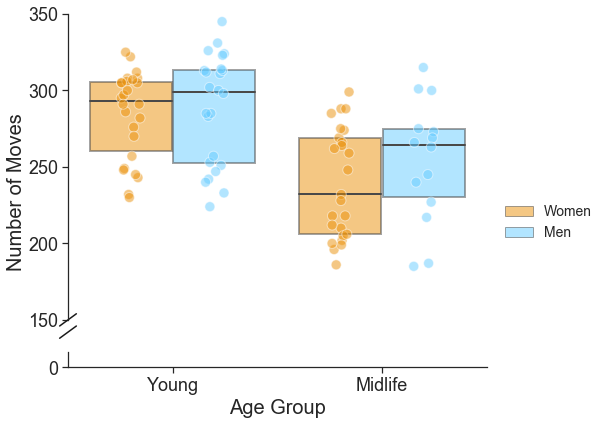

In [34]:
#### MAZE: Moves

#Font
#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 


#Create foundation for plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7.5, 6.5), sharex=True,
                              gridspec_kw={'height_ratios': [20, 1]})
#fig.subplots_adjust(right=0.8)


#pink=#ff3399
color_pal = ['#eb9109', '#66ccff']

sns.set(style="ticks")

#Boxplot
sns.boxplot(x="Group", y="Moves", hue="Sex", data=maze,
                 palette=color_pal, order=["Young", "Midlife"],
                 linewidth=2, showfliers = False, saturation=1, whis=False, showcaps=False,
                 meanprops={"marker":" "},
                boxprops=dict(alpha=.5), ax=ax1)

sns.boxplot(x="Group", y="Moves", hue="Sex", data=maze,
                 palette=color_pal, order=["Young", "Midlife"],
                 linewidth=2, showfliers = False, saturation=1, whis=False, showcaps=False,
                 meanprops={"marker":" "},
                boxprops=dict(alpha=.5), ax=ax2)

#Individual datapoints
sns.stripplot(x="Group", y="Moves", hue="Sex", data=maze, order=["Young", "Midlife"],
              palette=color_pal, size=10, edgecolor="white", split=True, alpha=0.5,
             linewidth=1, jitter=True, ax=ax1)
sns.stripplot(x="Group", y="Moves", hue="Sex", data=maze, order=["Young", "Midlife"],
              palette=color_pal, size=10, edgecolor="white", split=True, alpha=0.5,
             linewidth=1, jitter=True, ax=ax2)


#Add x-ticks on the middle of the group bars
plt.xlabel('Age Group', fontsize='20')
plt.ylabel('Number of Moves', fontsize='17', horizontalalignment='center')
fig.text(0.03,0.5, "Number of Moves", ha="center", va="center", rotation=90,
        fontsize='20')
plt.xticks([0,1],['Young', 'Midlife'], fontsize='18')

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_ylabel('')


#Limits for the y-axis
ax1.set_yticks(np.linspace(150, 350, 5))
ax1.set_ylim(150, 350)  # most of the data
ax1.spines['left'].set_bounds(150,350)
ax1.tick_params(bottom=False,
               labelbottom=False)
ax2.set_yticks(np.linspace(0, 5, 2))
ax2.set_ylim(0, 5)  # nothing
ax2.get_yticklines()[1].set_visible(False)
ax2.get_yticklabels()[1].set_visible(False)
ax2.set_yticks(ax2.get_yticks()[:-1]) 


ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)


#Remove right and top frame
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

d = 0.02  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
#kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (-0.04-d, -0.04+d), **kwargs)  # bottom-left diagonal



#Adding average moves
#ch = plt.plot([-0.4, 1.4], [268.08, 268.08], color='grey', linestyle='--', linewidth=2)


#Legend placement
#Legend placement
#bbox_to_anchor=(1.05, 1), borderaxespad=0.
ax1.get_legend().remove()
handles, labels = ax2.get_legend_handles_labels()
leg = plt.legend(handles[:2], labels[:2], loc=2,
                 frameon=False,  fontsize='14',
                 bbox_to_anchor=(1.03, 11), borderaxespad=0.)
leg.get_texts()[0].set_text('Women')
leg.get_texts()[1].set_text('Men')
for lh in leg.legendHandles: 
    lh.set_alpha(0.5)
    
# statistical annotation
#young vs midlife
#x1, x2 = 0, 1
#y, h, col = 380, 0, 'k'
#ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
#ax1.text((x1+x2)*.5, (y-2)+h, "***", ha='center', va='bottom', color=col, fontsize='20')

#young female vs young male
#x1, x2 = -0.2, 0.2
#y, h, col = 360, 0, 'k'
#ax1.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax1.text((x1+x2)*.5, (y+2.5)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#old female vs old male
#x1, x2 = 0.8, 1.2
#y, h, col = 360, 0, 'k'
#ax1.plot([x1, x2], [y+h, y+h], lw=1.5, c=col)
#ax1.text((x1+x2)*.5, (y+2.5)+h, "ns", ha='center', va='bottom', color=col, fontsize='13')

#plt.savefig('Yu_Fig3B_2021.png', dpi=1200)
plt.show()

In [35]:
###### LOOP: Dataframe and summary

loop = pd.read_csv("LOOP_ALL_2020_python_removed.csv")
loop['Radius'] = loop['Radius'].apply(str)
loop.groupby(["Group", "Sex", "Radius"]).mean()

Age  Total_trials  mean_dist  pstd_dist  \
Group   Sex    Radius                                                  
Midlife Female 1       50.000000      8.419355   0.732255   0.350595   
               2       50.125000      9.218750   1.747479   0.854711   
               3       50.354839      8.096774   3.083709   1.346848   
        Male   1       51.363636      8.136364   0.734647   0.322079   
               2       51.347826      9.217391   1.652515   0.857480   
               3       51.300000      8.500000   2.914622   1.518397   
Young   Female 1       19.840000      9.040000   0.811974   0.422446   
               2       19.923077      8.961538   1.760176   0.820181   
               3       19.608696      8.652174   3.093963   1.397005   
        Male   1       20.074074      7.777778   0.735398   0.314679   
               2       20.074074      8.259259   1.463889   0.688484   
               3       20.000000      7.437500   2.189655   1.323918   

                       mean_angl  pstd_angl  mean_degrees  pstd_degrees  
Group   Sex    Radius                                                    
Midlife Female 1       48.799386  25.219215    351.081155     38.022395  
               2       59.281102  33.316097    386.747435     54.694980  
               3       68.633951  34.921508    393.103814     60.032988  
        Male   1       46.026708  23.130732    336.897440     35.118872  
               2       49.988441  31.185368    346.340826     50.154801  
               3       65.754976  36.963456    341.388422     70.299928  
Young   Female 1       52.201953  31.056404    351.850928     54.565099  
               2       57.233102  30.735094    371.695960     58.252681  
               3       70.148019  36.476109    365.413839     65.342214  
        Male   1       46.597881  22.740006    344.172888     37.689345  
               2       45.969770  24.100118    354.677378     39.766033  
               3       45.975576  30.169543    348.446513     54.388902

In [14]:
s

53.74529758507508

In [36]:
#Female

#mean
x_bar = loop[(loop.Sex == "Female")].mean_degrees.mean()
#std
s = loop[(loop.Sex == "Female")].mean_degrees.std()
#n (x 3 because 1 row for each subject)
n = len(loop[(loop.Sex == "Female")])
z = 1.96

upper_f = x_bar + (z * (s/np.sqrt(n)))
lower_f = x_bar - (z * (s/np.sqrt(n)))

print(lower_f, x_bar, upper_f)

360.5812686730368 370.8960617910715 381.21085490910616


In [37]:
#Male

#mean
x_bar = loop[(loop.Sex == "Male")].mean_degrees.mean()
#std
s = loop[(loop.Sex == "Male")].mean_degrees.std()
#n (x 3 because 1 row for each subject)
n = len(loop[(loop.Sex == "Male")])
z = 1.96

upper_m = x_bar + (z * (s/np.sqrt(n)))
lower_m = x_bar - (z * (s/np.sqrt(n)))

print(lower_m, x_bar, upper_m)

336.48520892143927 345.5515000162961 354.6177911111529


In [38]:
###### LOOP: Mean for Position Error

#Young
loop_young_pe1 = loop[(loop.Group=='Young') & (loop.Radius=='1')].mean_dist.mean()
print(loop_young_pe1)
loop_young_pe2 = loop[(loop.Group=='Young') & (loop.Radius=='2')].mean_dist.mean()
print(loop_young_pe2)
loop_young_pe3 = loop[(loop.Group=='Young') & (loop.Radius=='3')].mean_dist.mean()
print(loop_young_pe3)

#Old
loop_old_pe1 =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].mean_dist.mean()
print(loop_old_pe1)
loop_old_pe2 =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].mean_dist.mean()
print(loop_old_pe2)
loop_old_pe3 =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].mean_dist.mean()
print(loop_old_pe3)

#Young female
loop_young_f_pe1 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_dist.mean()
print(loop_young_f_pe1)
loop_young_f_pe2 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_dist.mean()
print(loop_young_f_pe2)
loop_young_f_pe3 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_dist.mean()
print(loop_young_f_pe3)

#Young male
loop_young_m_pe1 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_dist.mean()
print(loop_young_m_pe1)
loop_young_m_pe2 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_dist.mean()
print(loop_young_m_pe2)
loop_young_m_pe3 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_dist.mean()
print(loop_young_m_pe3)

#Old female
loop_old_f_pe1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_dist.mean()
print(loop_old_f_pe1)
loop_old_f_pe2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_dist.mean()
print(loop_old_f_pe2)
loop_old_f_pe3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_dist.mean()
print(loop_old_f_pe3)

#Old male
loop_old_m_pe1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_dist.mean()
print(loop_old_m_pe1)
loop_old_m_pe2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_dist.mean()
print(loop_old_m_pe2)
loop_old_m_pe3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_dist.mean()
print(loop_old_m_pe3)

0.7722132337115386
1.609237124037736
2.7229652593846154
0.7332474869056603
1.7077667630000002
3.0174002640196074
0.81197396448
1.7601755683846154
3.0939633976956515
0.7353977422592592
1.4638889924444443
2.1896554355625004
0.7322545223870967
1.7474791988437501
3.0837088999032263
0.7346466641818182
1.6525146783478262
2.9146218784


In [39]:
###### LOOP: SEM for Position Error

#Young
loop_young_pe1_sem = loop[(loop.Group=='Young') & (loop.Radius=='1')].mean_dist.sem()
print(loop_young_pe1_sem)
loop_young_pe2_sem = loop[(loop.Group=='Young') & (loop.Radius=='2')].mean_dist.sem()
print(loop_young_pe2_sem)
loop_young_pe3_sem = loop[(loop.Group=='Young') & (loop.Radius=='3')].mean_dist.sem()
print(loop_young_pe3_sem)

#Old
loop_old_pe1_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].mean_dist.sem()
print(loop_old_pe1_sem)
loop_old_pe2_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].mean_dist.sem()
print(loop_old_pe2_sem)
loop_old_pe3_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].mean_dist.sem()
print(loop_old_pe3_sem)

#Young female
loop_young_f_pe1_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_dist.sem()
print(loop_young_f_pe1_sem)
loop_young_f_pe2_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_dist.sem()
print(loop_young_f_pe2_sem)
loop_young_f_pe3_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_dist.sem()
print(loop_young_f_pe3_sem)

#Young male
loop_young_m_pe1_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_dist.sem()
print(loop_young_m_pe1_sem)
loop_young_m_pe2_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_dist.sem()
print(loop_young_m_pe2_sem)
loop_young_m_pe3_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_dist.sem()
print(loop_young_m_pe3_sem)

#Old female
loop_old_f_pe1_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_dist.sem()
print(loop_old_f_pe1_sem)
loop_old_f_pe2_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_dist.sem()
print(loop_old_f_pe2_sem)
loop_old_f_pe3_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_dist.sem()
print(loop_old_f_pe3_sem)

#Old male
loop_old_m_pe1_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_dist.sem()
print(loop_old_m_pe1_sem)
loop_old_m_pe2_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_dist.sem()
print(loop_old_m_pe2_sem)
loop_old_m_pe3_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_dist.sem()
print(loop_old_m_pe3_sem)

0.040038709436611794
0.09520802427322855
0.18401422087150981
0.03954165951135776
0.09602517427174873
0.13030898082202189
0.0488561486795225
0.14044599211317202
0.2543904467609145
0.06251090441320256
0.12516599993129637
0.20125015739376148
0.05293989707419759
0.14236144943623855
0.1784271029111754
0.06070655432191359
0.11895915958064493
0.18739792330055027


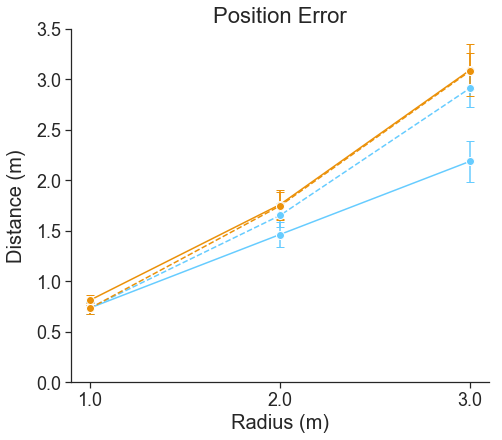

In [79]:
#### LOOP: PE Graph

#Line graph POSITION ERROR using Broken axes

#from brokenaxes import brokenaxes

#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger, x=15, y=14 originally
matplotlib.rc('ytick', labelsize=18) 

#Create foundation for plot
#fig, ax = plt.subplots(1, 1, figsize=(7, 5.5))
#fig.subplots_adjust(right=0.8)

fig, ax = plt.subplots(figsize=(7.5,6.5))
#fig.subplots_adjust(right=0.8)


#Average DE values: Radius 1, 2, 3
loop_fyoung_pe = [loop_young_f_pe1,
                 loop_young_f_pe2,
                 loop_young_f_pe3]
loop_myoung_pe = [loop_young_m_pe1,
                 loop_young_m_pe2,
                 loop_young_m_pe3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fyoung_pe_error = [loop_young_f_pe1_sem,
                    loop_young_f_pe2_sem,
                    loop_young_f_pe3_sem]
loop_myoung_pe_error = [loop_young_m_pe1_sem,
                    loop_young_m_pe2_sem,
                    loop_young_m_pe3_sem]

#Average DE values: Radius 1, 2, 3
loop_fold_pe = [loop_old_f_pe1,
                 loop_old_f_pe2,
                 loop_old_f_pe3]
loop_mold_pe = [loop_old_m_pe1,
               loop_old_m_pe2,
               loop_old_m_pe3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fold_pe_error = [loop_old_f_pe1_sem,
                  loop_old_f_pe2_sem,
                  loop_old_f_pe3_sem]
loop_mold_pe_error = [loop_old_m_pe1_sem,
                  loop_old_m_pe2_sem,
                  loop_old_m_pe3_sem]

#Plotting

#Set position of bars on x-axis
r = [1, 2, 3]

plt.ylim(0,3.5)
#plt.yticks(np.linspace(0, 3.5, 3))

#bax = brokenaxes(ylims=((0, 10), (300, 420)), hspace=.05)


#pink=#ff3399
#color_pal = ['#eb9109', '#66ccff']

#Young
plt.errorbar(r, loop_myoung_pe, yerr=loop_myoung_pe_error,
                color='#66ccff',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Male")
plt.errorbar(r, loop_fyoung_pe, yerr=loop_fyoung_pe_error,
                color='#eb9109',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Female")


#Midlife
plt.errorbar(r, loop_mold_pe, yerr=loop_mold_pe_error,
                color='#66ccff',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Male")
plt.errorbar(r, loop_fold_pe, yerr=loop_fold_pe_error,
                color='#eb9109',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Female")



#Legend
lines = [Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='--'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='--')]
labels = ['Young Men', 'Young Women', 'Midlife Men', 'Midlife Women']

#plt.legend(lines, labels,loc='upper left', frameon=False, fontsize='15')

#plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc=2, 
           #frameon=False, borderaxespad=0.)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Add x-ticks on the middle of the group bars
plt.xlabel('Radius (m)', fontsize='20')
plt.ylabel('Distance (m)', fontsize='20', horizontalalignment='center',
              labelpad=10)
plt.xticks(r, ['1.0', '2.0', '3.0'])


#Add title
plt.title('Position Error', fontsize='22')


#plt.savefig('Yu_Fig2E.pdf', dpi=1200)
plt.show()

In [44]:
###### LOOP: Mean for PSTD Position Error

#Young
loop_young_pstdpe1 = loop[(loop.Group=='Young') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_young_pstdpe1)
loop_young_pstdpe2 = loop[(loop.Group=='Young') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_young_pstdpe2)
loop_young_pstdpe3 = loop[(loop.Group=='Young') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_young_pstdpe3)

#Old
loop_old_pstdpe1 =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_old_pstdpe1)
loop_old_pstdpe2 =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_old_pstdpe2)
loop_old_pstdpe3 =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_old_pstdpe3)

#Young female
loop_young_f_pstdpe1 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_young_f_pstdpe1)
loop_young_f_pstdpe2 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_young_f_pstdpe2)
loop_young_f_pstdpe3 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_young_f_pstdpe3)

#Young male
loop_young_m_pstdpe1 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_young_m_pstdpe1)
loop_young_m_pstdpe2 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_young_m_pstdpe2)
loop_young_m_pstdpe3 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_young_m_pstdpe3)

#Old female
loop_old_f_pstdpe1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_old_f_pstdpe1)
loop_old_f_pstdpe2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_old_f_pstdpe2)
loop_old_f_pstdpe3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_old_f_pstdpe3)

#Old male
loop_old_m_pstdpe1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_dist.mean()
print(loop_old_m_pstdpe1)
loop_old_m_pstdpe2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_dist.mean()
print(loop_old_m_pstdpe2)
loop_old_m_pstdpe3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_dist.mean()
print(loop_old_m_pstdpe3)

0.36649028238461534
0.7530903404905659
1.3670201404358975
0.3387582475849057
0.855868966218182
1.4141218454901958
0.42244634928
0.8201814546153845
1.3970045206086956
0.3146791093333334
0.6884840824444444
1.3239175939375
0.3505951610967743
0.8547108960937501
1.3468476227419353
0.32207896036363637
0.8574801942173913
1.5183968907499996


In [45]:
###### LOOP: SEM for PSTD Position Error

#Young
loop_young_pe1_pstdsem = loop[(loop.Group=='Young') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_young_pe1_pstdsem)
loop_young_pe2_pstdsem = loop[(loop.Group=='Young') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_young_pe2_pstdsem)
loop_young_pe3_pstdsem = loop[(loop.Group=='Young') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_young_pe3_pstdsem)

#Old
loop_old_pe1_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_old_pe1_pstdsem)
loop_old_pe2_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_old_pe2_pstdsem)
loop_old_pe3_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_old_pe3_pstdsem)

#Young female
loop_young_f_pe1_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_young_f_pe1_pstdsem)
loop_young_f_pe2_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_young_f_pe2_pstdsem)
loop_young_f_pe3_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_young_f_pe3_pstdsem)

#Young male
loop_young_m_pe1_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_young_m_pe1_pstdsem)
loop_young_m_pe2_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_young_m_pe2_pstdsem)
loop_young_m_pe3_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_young_m_pe3_pstdsem)

#Old female
loop_old_f_pe1_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_old_f_pe1_pstdsem)
loop_old_f_pe2_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_old_f_pe2_pstdsem)
loop_old_f_pe3_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_old_f_pe3_pstdsem)

#Old male
loop_old_m_pe1_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_dist.sem()
print(loop_old_m_pe1_pstdsem)
loop_old_m_pe2_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_dist.sem()
print(loop_old_m_pe2_pstdsem)
loop_old_m_pe3_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_dist.sem()
print(loop_old_m_pe3_pstdsem)

0.018111691932228016
0.039376898225220204
0.05401202865378909
0.013995919651851024
0.03864668517994026
0.05140136102594874
0.025305370600237426
0.054972416833544695
0.05794577181966434
0.021844167572459036
0.054423702396170476
0.10356220432337505
0.01778844206063766
0.057493381595909006
0.06602961488512267
0.022559140733176008
0.047812715094262125
0.07821818827725763


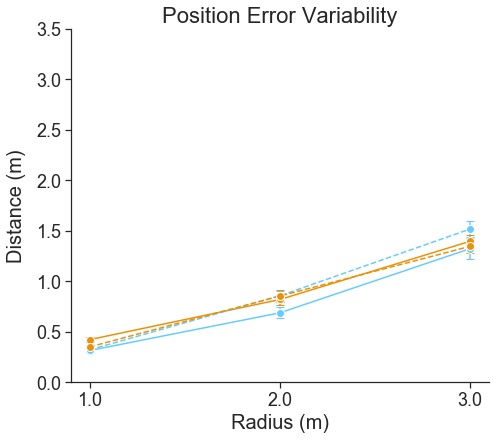

In [53]:
#### LOOP: PSTD PE graph



#Line graph PSTD POSITION ERROR using Broken axes

#from brokenaxes import brokenaxes

#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 

#Create foundation for plot
#fig, ax = plt.subplots(1, 1, figsize=(7, 5.5))
#fig.subplots_adjust(right=0.8)

fig, ax = plt.subplots(figsize=(7.5,6.5))
#fig.subplots_adjust(right=0.8)


#Average PSTD PE values: Radius 1, 2, 3
loop_fyoung_pstdpe = [loop_young_f_pstdpe1,
                 loop_young_f_pstdpe2,
                 loop_young_f_pstdpe3]
loop_myoung_pstdpe = [loop_young_m_pstdpe1,
                 loop_young_m_pstdpe2,
                 loop_young_m_pstdpe3]

#Standard PSTD PE error of the mean bars: Radius 1, 2, 3
loop_fyoung_pstdpe_error = [loop_young_f_pe1_pstdsem,
                    loop_young_f_pe2_pstdsem,
                    loop_young_f_pe3_pstdsem]
loop_myoung_pstdpe_error = [loop_young_m_pe1_pstdsem,
                    loop_young_m_pe2_pstdsem,
                    loop_young_m_pe3_pstdsem]

#Average PSTD PE values: Radius 1, 2, 3
loop_fold_pstdpe = [loop_old_f_pstdpe1,
                 loop_old_f_pstdpe2,
                 loop_old_f_pstdpe3]
loop_mold_pstdpe = [loop_old_m_pstdpe1,
               loop_old_m_pstdpe2,
               loop_old_m_pstdpe3]

#Standard PSTD PE error of the mean bars: Radius 1, 2, 3
loop_fold_pstdpe_error = [loop_old_f_pe1_pstdsem,
                  loop_old_f_pe2_pstdsem,
                  loop_old_f_pe3_pstdsem]
loop_mold_pstdpe_error = [loop_old_m_pe1_pstdsem,
                  loop_old_m_pe2_pstdsem,
                  loop_old_m_pe3_pstdsem]

#Plotting

#Set position of bars on x-axis
r = [1, 2, 3]

plt.ylim(0,3.5)


#bax = brokenaxes(ylims=((0, 10), (300, 420)), hspace=.05)

#orange=#eb9109
#pink=#ff3399

#Young
plt.errorbar(r, loop_myoung_pstdpe, yerr=loop_myoung_pstdpe_error,
                color='#66ccff',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Male")
plt.errorbar(r, loop_fyoung_pstdpe, yerr=loop_fyoung_pstdpe_error,
                color='#eb9109',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Female")


#Midlife
plt.errorbar(r, loop_mold_pstdpe, yerr=loop_mold_pstdpe_error,
                color='#66ccff',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Male")
plt.errorbar(r, loop_fold_pstdpe, yerr=loop_fold_pstdpe_error,
                color='#eb9109',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Female")



#Legend
lines = [Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='--'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='--')]
labels = ['Young Men', 'Young Women', 'Midlife Men', 'Midlife Women']

#plt.legend(lines, labels,loc='best', fontsize='20', frameon=False)

#plt.legend(lines, labels, fontsize='18', bbox_to_anchor=(1.05, 1), loc=2, 
#           frameon=False, borderaxespad=0.)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Add x-ticks on the middle of the group bars
plt.xlabel('Radius (m)', fontsize='20')
plt.ylabel('Distance (m)', fontsize='20', horizontalalignment='center',
              labelpad=10)
plt.xticks(r, ['1.0', '2.0', '3.0'])


#Add title
plt.title('Position Error Variability', fontsize='22')


#plt.savefig('Yu_Fig2B_2021_withlegend.png', dpi=1200)
plt.show()

In [54]:
###### LOOP: Mean for Degrees Traveled + PSTD Degrees

#Young
loop_young_de1 = loop[(loop.Group=='Young') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_young_de1)
loop_young_de2 = loop[(loop.Group=='Young') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_young_de2)
loop_young_de3 = loop[(loop.Group=='Young') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_young_de3)


#Old
loop_old_de1 =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_old_de1)
loop_old_de2 =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_old_de2)
loop_old_de3 =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_old_de3)

#Female
loop_fe_de1 = loop[(loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_fe_de1)
loop_fe_de2 = loop[(loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_fe_de2)
loop_fe_de3 = loop[(loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_fe_de3)

#Male
loop_me_de1 = loop[(loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_me_de1)
loop_me_de2 = loop[(loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_me_de2)
loop_me_de3 = loop[(loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_me_de3)


#Young female
loop_young_f_de1 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_young_f_de1)
loop_young_f_de2 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_young_f_de2)
loop_young_f_de3 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_young_f_de3)

loop_young_f_pstdde1 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_degrees.mean()
print(loop_young_f_pstdde1)
loop_young_f_pstdde2 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_degrees.mean()
print(loop_young_f_pstdde2)
loop_young_f_pstdde3 = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_degrees.mean()
print(loop_young_f_pstdde3)


#Young male
loop_young_m_de1 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_young_m_de1)
loop_young_m_de2 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_young_m_de2)
loop_young_m_de3 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_young_m_de3)

loop_young_m_pstdde1 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_degrees.mean()
print(loop_young_m_pstdde1)
loop_young_m_pstdde2 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_degrees.mean()
print(loop_young_m_pstdde2)
loop_young_m_pstdde3 =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_degrees.mean()
print(loop_young_m_pstdde3)


#Old female
loop_old_f_de1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_old_f_de1)
loop_old_f_de2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_old_f_de2)
loop_old_f_de3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_old_f_de3)

loop_old_f_pstdde1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_degrees.mean()
print(loop_old_f_pstdde1)
loop_old_f_pstdde2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_degrees.mean()
print(loop_old_f_pstdde2)
loop_old_f_pstdde3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_degrees.mean()
print(loop_old_f_pstdde3)


#Old male
loop_old_m_de1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.mean()
print(loop_old_m_de1)
loop_old_m_de2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.mean()
print(loop_old_m_de2)
loop_old_m_de3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.mean()
print(loop_old_m_de3)

loop_old_m_pstdde1 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_degrees.mean()
print(loop_old_m_pstdde1)
loop_old_m_pstdde2 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_degrees.mean()
print(loop_old_m_pstdde2)
loop_old_m_pstdde3 =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_degrees.mean()
print(loop_old_m_pstdde3)

347.8642533269231
363.0261163566038
358.4528844615384
345.1935749037736
369.85012562181817
372.82326804117645
351.42480350535715
380.00022173965516
381.3099356240739
340.90636013469395
350.84256430399995
344.5253511222221
351.85092787200006
371.69595963076915
365.4138385304348
54.565099231880005
58.252681385769215
65.34221441678261
344.1728880074075
354.6773783888889
348.4465129875
37.68934481518517
39.76603263814815
54.388902055625
351.0811548225806
386.7474347031249
393.10381411290314
38.02239479903226
54.69498023500001
60.03298825874194
336.8974395636364
346.3408260304348
341.38842163
35.11887229318183
50.15480096652174
70.299927816


In [55]:
###### LOOP: SEM for Degrees Traveled + PSTD Dgrees

#Young
loop_young_de1_sem = loop[(loop.Group=='Young') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_young_de1_sem)
loop_young_de2_sem = loop[(loop.Group=='Young') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_young_de2_sem)
loop_young_de3_sem = loop[(loop.Group=='Young') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_young_de3_sem)

#Old
loop_old_de1_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_old_de1_sem)
loop_old_de2_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_old_de2_sem)
loop_old_de3_sem =  loop[(loop.Group=='Midlife') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_old_de3_sem)

#Female
loop_fe_de1_sem =  loop[(loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_fe_de1_sem)
loop_fe_de2_sem =  loop[(loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_fe_de2_sem)
loop_fe_de3_sem =  loop[(loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_fe_de3_sem)

#Male
loop_me_de1_sem =  loop[(loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_me_de1_sem)
loop_me_de2_sem =  loop[(loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_me_de2_sem)
loop_me_de3_sem =  loop[(loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_me_de3_sem)

#Young female
loop_young_f_de1_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_young_f_de1_sem)
loop_young_f_de2_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_young_f_de2_sem)
loop_young_f_de3_sem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_young_f_de3_sem)

loop_young_f_de1_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_degrees.sem()
print(loop_young_f_de1_pstdsem)
loop_young_f_de2_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_degrees.sem()
print(loop_young_f_de2_pstdsem)
loop_young_f_de3_pstdsem = loop[(loop.Group=='Young') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_degrees.sem()
print(loop_young_f_de3_pstdsem)


#Young male
loop_young_m_de1_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_young_m_de1_sem)
loop_young_m_de2_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_young_m_de2_sem)
loop_young_m_de3_sem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_young_m_de3_sem)

loop_young_m_de1_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_degrees.sem()
print(loop_young_m_de1_pstdsem)
loop_young_m_de2_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_degrees.sem()
print(loop_young_m_de2_pstdsem)
loop_young_m_de3_pstdsem =  loop[(loop.Group=='Young') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_degrees.sem()
print(loop_young_m_de3_pstdsem)


#Old female
loop_old_f_de1_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_old_f_de1_sem)
loop_old_f_de2_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_old_f_de2_sem)
loop_old_f_de3_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_old_f_de3_sem)

loop_old_f_de1_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='1')].pstd_degrees.sem()
print(loop_old_f_de1_pstdsem)
loop_old_f_de2_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='2')].pstd_degrees.sem()
print(loop_old_f_de2_pstdsem)
loop_old_f_de3_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Female') & (loop.Radius=='3')].pstd_degrees.sem()
print(loop_old_f_de3_pstdsem)


#Old male
loop_old_m_de1_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].mean_degrees.sem()
print(loop_old_m_de1_sem)
loop_old_m_de2_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].mean_degrees.sem()
print(loop_old_m_de2_sem)
loop_old_m_de3_sem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].mean_degrees.sem()
print(loop_old_m_de3_sem)

loop_old_m_de1_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='1')].pstd_degrees.sem()
print(loop_old_m_de1_pstdsem)
loop_old_m_de2_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='2')].pstd_degrees.sem()
print(loop_old_m_de2_pstdsem)
loop_old_m_de3_pstdsem =  loop[(loop.Group=='Midlife') & (loop.Sex=='Male') & (loop.Radius=='3')].pstd_degrees.sem()
print(loop_old_m_de3_pstdsem)

7.211473385956607
8.058881715422888
11.275899561638472
6.776965090590976
8.7737348470443
11.168942163173282
7.079541597872199
8.97698225129927
10.645520558661577
6.758097364576583
6.987632738258386
11.181235556277182
10.625393743606683
12.562807065032334
16.687713479696875
9.934988232474483
6.760500416906241
7.670913821152607
9.943826734697298
10.167266706136813
13.663053727027759
3.9686878008292013
4.848059509994752
7.20959947351346
9.650991628060682
12.723111917790098
13.651092960672862
3.0442607290008543
5.75565671132137
5.424051275559192
8.99314938585618
9.554808193467887
17.189306067991033
3.2487686590025966
4.987054388964125
14.854674855335276


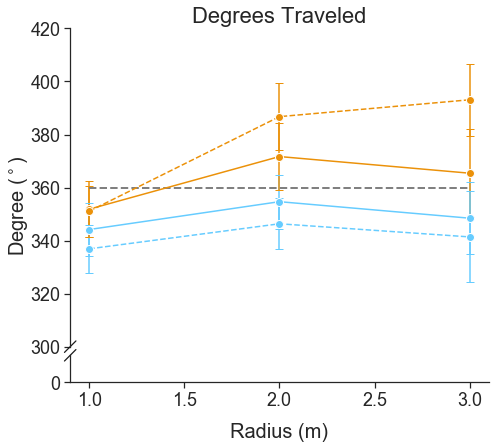

In [59]:
#### LOOP: DE Graph


#Line graph DEGREES using Broken axes

from brokenaxes import brokenaxes

#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 


#Create foundation for plot
#fig, ax = plt.subplots(1, 1, figsize=(7, 5.5))
#fig.subplots_adjust(right=0.8)

fig = plt.figure(figsize=(7.5,6.5)) #length, height
#fig.subplots_adjust(right=0.8)

#Average DE values: Radius 1, 2, 3
loop_fyoung_de = [loop_young_f_de1,
                 loop_young_f_de2,
                 loop_young_f_de3]
loop_myoung_de = [loop_young_m_de1,
                 loop_young_m_de2,
                 loop_young_m_de3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fyoung_de_error = [loop_young_f_de1_sem,
                    loop_young_f_de2_sem,
                    loop_young_f_de3_sem]
loop_myoung_de_error = [loop_young_m_de1_sem,
                    loop_young_m_de2_sem,
                    loop_young_m_de3_sem]

#Average DE values: Radius 1, 2, 3
loop_fold_de = [loop_old_f_de1,
                 loop_old_f_de2,
                 loop_old_f_de3]
loop_mold_de = [loop_old_m_de1,
               loop_old_m_de2,
               loop_old_m_de3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fold_de_error = [loop_old_f_de1_sem,
                  loop_old_f_de2_sem,
                  loop_old_f_de3_sem]
loop_mold_de_error = [loop_old_m_de1_sem,
                  loop_old_m_de2_sem,
                  loop_old_m_de3_sem]

#Plotting

#Set position of bars on x-axis
r = [1, 2, 3]


bax = brokenaxes(ylims=((0, 10), (300, 420)), hspace=.05)


#orange=#eb9109
#pink=#ff3399
#Young
bax.errorbar(r, loop_myoung_de, yerr=loop_myoung_de_error,
                color='#66ccff',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Male")
bax.errorbar(r, loop_fyoung_de, yerr=loop_fyoung_de_error,
                color='#eb9109',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Female")


#Midlife
bax.errorbar(r, loop_mold_de, yerr=loop_mold_de_error,
                color='#66ccff',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Male")
bax.errorbar(r, loop_fold_de, yerr=loop_fold_de_error,
                color='#eb9109',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Female")


#Add 360 deg line
ch = bax.plot([r[0], r[2]], [360, 360], linestyle='--', color="grey", linewidth=2)


#Legend
lines = [Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='-'),
        Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='--'),
        Line2D([0], [0], color='#eb9109', linewidth=2, linestyle='--')]
labels = ['Young Men', 'Young Women', 'Midlife Men', 'Midlife Women']
#plt.legend(lines, labels,loc='best', frameon=False)

#plt.legend(lines, labels, fontsize='18',bbox_to_anchor=(1.03, 1), loc=2, 
           #frameon=False, borderaxespad=0.)


#Add x-ticks on the middle of the group bars
bax.set_xlabel('Radius (m)', fontsize='20')
bax.set_ylabel('Degree ($^\circ$)', fontsize='20', horizontalalignment='center',
              labelpad=40)
bax.set_xticks(r, ['1.0', '2.0', '3.0'])

#Add title
bax.set_title('Degrees Traveled', fontsize='22')


#plt.savefig('Yu_Fig2C_2021.png', dpi=1200)
plt.show()

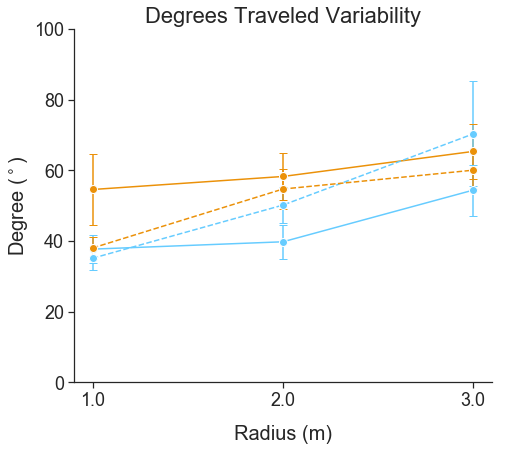

In [61]:
#### LOOP : PSTD DE graph

#Line graph PSTD DEGREES using Broken axes

from brokenaxes import brokenaxes

#matplotlib.rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
mpl.rc('font',family='Arial')
matplotlib.rc('xtick', labelsize=18)  #generally want to make this bigger
matplotlib.rc('ytick', labelsize=18) 


#Create foundation for plot
#fig, ax = plt.subplots(1, 1, figsize=(7, 5.5))
#fig.subplots_adjust(right=0.8)

fig, ax = plt.subplots(figsize=(7.5,6.5))
#fig.subplots_adjust(right=0.8)

#Average DE values: Radius 1, 2, 3
loop_fyoung_pstdde = [loop_young_f_pstdde1,
                 loop_young_f_pstdde2,
                 loop_young_f_pstdde3]
loop_myoung_pstdde = [loop_young_m_pstdde1,
                 loop_young_m_pstdde2,
                 loop_young_m_pstdde3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fyoung_de_pstderror = [loop_young_f_de1_pstdsem,
                    loop_young_f_de2_pstdsem,
                    loop_young_f_de3_pstdsem]
loop_myoung_de_pstderror = [loop_young_m_de1_pstdsem,
                    loop_young_m_de2_pstdsem,
                    loop_young_m_de3_pstdsem]

#Average DE values: Radius 1, 2, 3
loop_fold_pstdde = [loop_old_f_pstdde1,
                 loop_old_f_pstdde2,
                 loop_old_f_pstdde3]
loop_mold_pstdde = [loop_old_m_pstdde1,
               loop_old_m_pstdde2,
               loop_old_m_pstdde3]

#Standard DE error of the mean bars: Radius 1, 2, 3
loop_fold_de_pstderror = [loop_old_f_de1_pstdsem,
                  loop_old_f_de2_pstdsem,
                  loop_old_f_de3_pstdsem]
loop_mold_de_pstderror = [loop_old_m_de1_pstdsem,
                  loop_old_m_de2_pstdsem,
                  loop_old_m_de3_pstdsem]

#Plotting

#Set position of bars on x-axis
r = [1, 2, 3]


#bax = brokenaxes(ylims=((0, 10), (40, 100)), hspace=.05)
plt.ylim(0,100)


#orange=#eb9109
#pink=#ff3399
#Young
plt.errorbar(r, loop_myoung_pstdde, yerr=loop_myoung_de_pstderror,
                color='#66ccff',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Male")
plt.errorbar(r, loop_fyoung_pstdde, yerr=loop_fyoung_de_pstderror,
                color='#eb9109',
                ls='-', marker='o', ms=8, mec="white", capsize=4, label="Young Female")


#Midlife
plt.errorbar(r, loop_mold_pstdde, yerr=loop_mold_de_pstderror,
                color='#66ccff',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Male")
plt.errorbar(r, loop_fold_pstdde, yerr=loop_fold_de_pstderror,
                color='#eb9109',
                ls='--', marker='o', ms=8, mec="white", capsize=4, label="Midlife Female")


#Add 360 deg line
ch = plt.plot([r[0], r[2]], [360, 360], linestyle='-.', color="grey", linewidth=2)


#Legend
#lines = [Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='-'),
#        Line2D([0], [0], color='#ff3399', linewidth=2, linestyle='-'),
#        Line2D([0], [0], color='#66ccff', linewidth=2, linestyle='--'),
#        Line2D([0], [0], color='#ff3399', linewidth=2, linestyle='--')]
#labels = ['Young Male', 'Young Female', 'Midlife Male', 'Midlife Female']
#bax.legend(lines, labels,loc='best', frameon=False)

#plt.legend(lines, labels, loc='lower right',
#           frameon=False, borderaxespad=0.)

#bbox_to_anchor=(1.05, 0.6), loc=2, 

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


#Add x-ticks on the middle of the group bars
plt.xlabel('Radius (m)', fontsize='20', labelpad=15)
plt.ylabel('Degree ($^\circ$)', fontsize='20', horizontalalignment='center')
plt.xticks(r,['1.0', '2.0', '3.0'], fontsize='18')

#Add title
plt.title('Degrees Traveled Variability', fontsize='22')


#plt.savefig('Yu_Fig2D_2021.png', dpi=1200)
plt.show()